In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Apple Gothic')

import koreanize_matplotlib 
from IPython.display import display

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
print(data.shape)
print(data.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 결측치

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

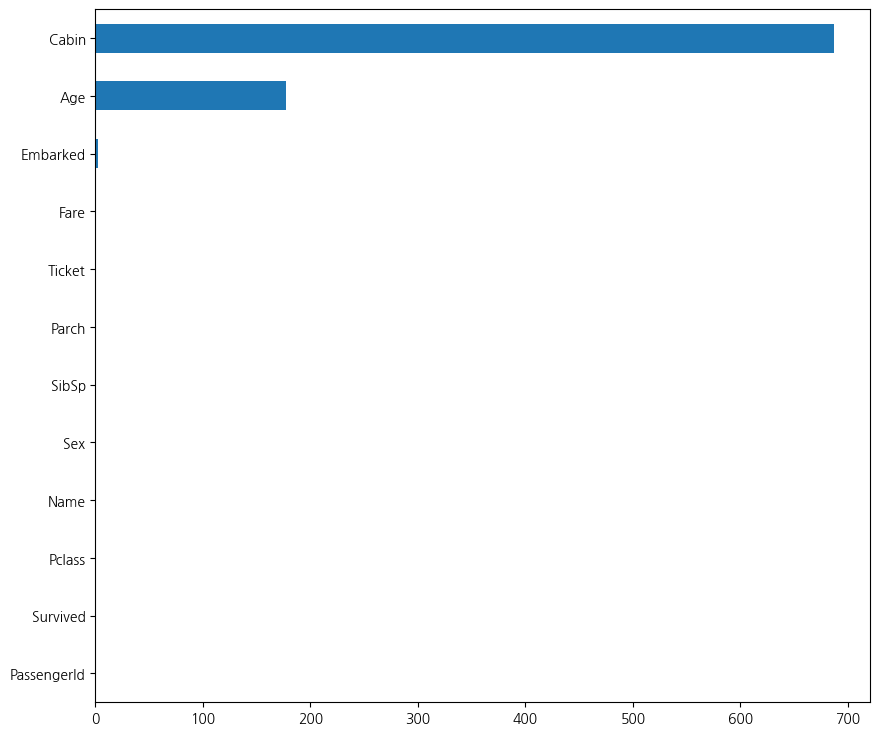

In [13]:
data.isnull().sum().sort_values().plot.barh(figsize=(10, 9))

In [14]:
data.isna().all(axis=1).sum() # 모든 변수가 결측치인 행은 없음

np.int64(0)

# 변수별 EDA
## Passenger Id : 행 번호랑 같으므로 삭제

In [15]:
data1 = data.drop(columns=["PassengerId"]).copy()

In [16]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Survived

In [17]:
data1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
data1["Survived"].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: title={'center': 'Survived'}, xlabel='Survived'>

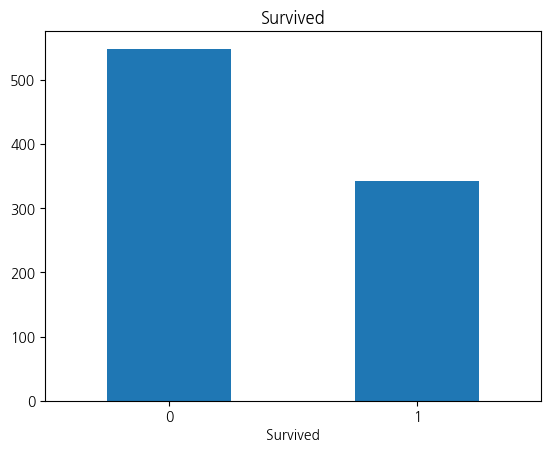

In [19]:
data1["Survived"].value_counts().plot.bar(rot=0, title="Survived")

Survived
0    549
1    342
Name: count, dtype: int64
[549 342]


Text(0.5, 1.0, 'Survival Rate (Pie)')

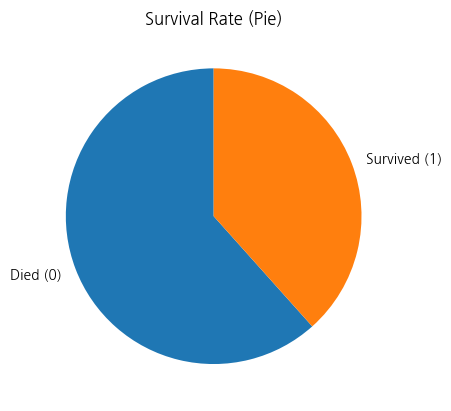

In [20]:
counts = data1["Survived"].value_counts().sort_index()
print(counts)
print(counts.values)
plt.pie(counts.values, labels=["Died (0)", "Survived (1)"], startangle=90)
plt.title("Survival Rate (Pie)")

## Pclass

In [21]:
data1["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
data1["Pclass"].value_counts(normalize = True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

<Axes: title={'center': 'Pclass'}, xlabel='Pclass'>

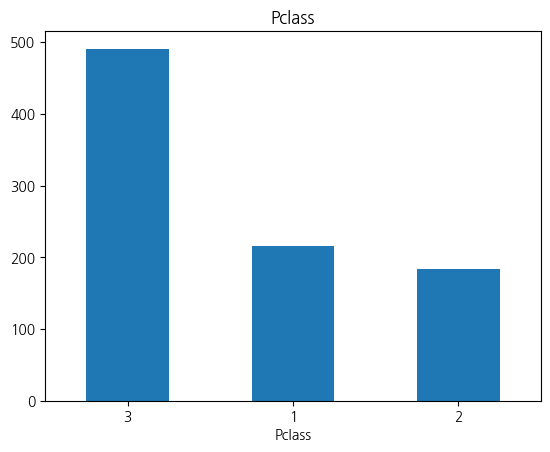

In [23]:
data1["Pclass"].value_counts().plot.bar(rot=0, title="Pclass")

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


Text(0.5, 1.0, 'Pclass Rate (Pie)')

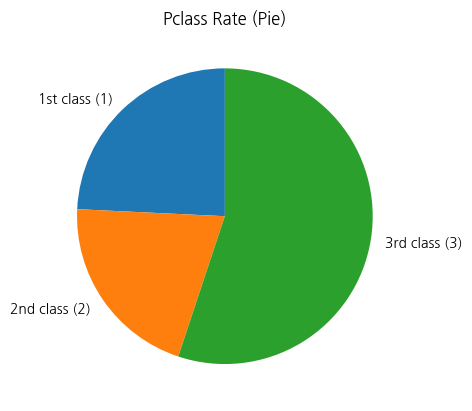

In [24]:
counts = data1["Pclass"].value_counts().sort_index()  # 범주별 count한 통계량 먼저 만들기
print(counts)
plt.pie(counts.values, labels=["1st class (1)", "2nd class (2)", "3rd class (3)"],
        startangle=90)
plt.title("Pclass Rate (Pie)")

## Sex

In [25]:
data1["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [26]:
data1["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
data1["Sex"].value_counts(normalize = True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

<Axes: title={'center': 'Sex'}, xlabel='Sex'>

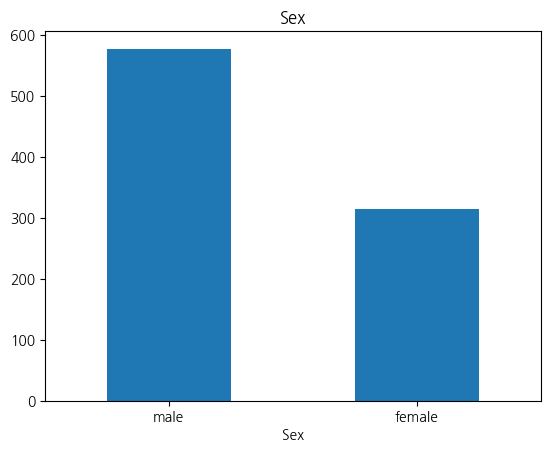

In [28]:
data1["Sex"].value_counts().plot.bar(rot=0, title = "Sex")

Sex
female    314
male      577
Name: count, dtype: int64


Text(0.5, 1.0, 'Sex Rate (Pie)')

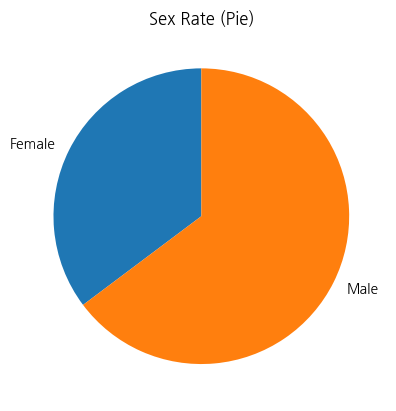

In [29]:
counts = data1["Sex"].value_counts().sort_index()
print(counts)
plt.pie(counts.values, labels=["Female", "Male"], startangle=90)
plt.title("Sex Rate (Pie)")

## Age

In [30]:
data1["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

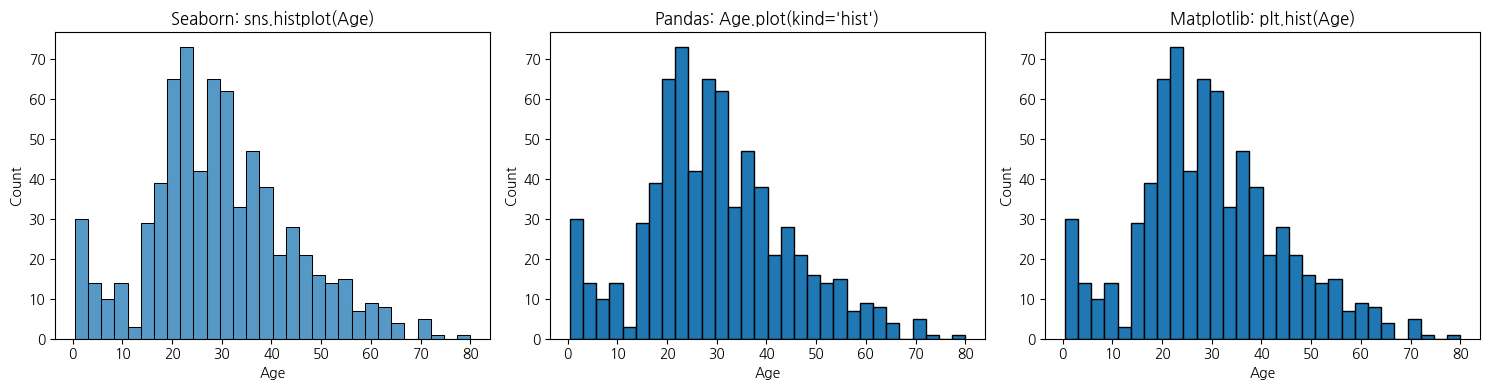

In [31]:
age = data1["Age"].dropna()
bins = 30

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) seaborn
sns.histplot(age, bins=bins, ax=axes[0])
axes[0].set_title("Seaborn: sns.histplot(Age)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# 2) pandas .plot
age.plot(kind="hist", bins=bins, edgecolor="black", ax=axes[1])
axes[1].set_title("Pandas: Age.plot(kind='hist')")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

# 3) matplotlib
axes[2].hist(age, bins=bins, edgecolor="black")
axes[2].set_title("Matplotlib: plt.hist(Age)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age histogram')

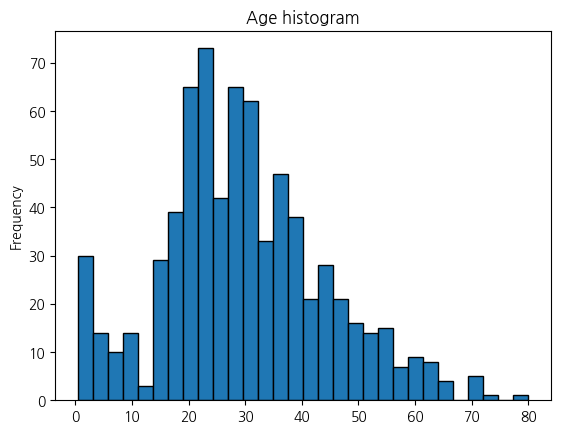

In [32]:
bins = 30
age.plot.hist(bins=bins, edgecolor="black")
plt.title("Age histogram")

<Axes: ylabel='Age'>

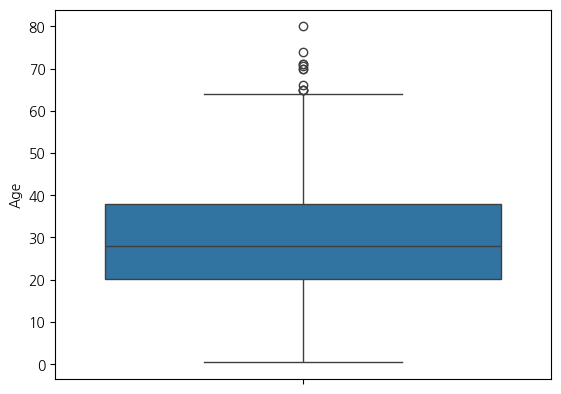

In [33]:
sns.boxplot(data1['Age'])

## 'SibSp' - 같이 탑승한 형제 또는 배우자

In [34]:
data1["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [35]:
data1["SibSp"].value_counts(normalize = True)

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64

<Axes: title={'center': 'SibSp'}, xlabel='SibSp'>

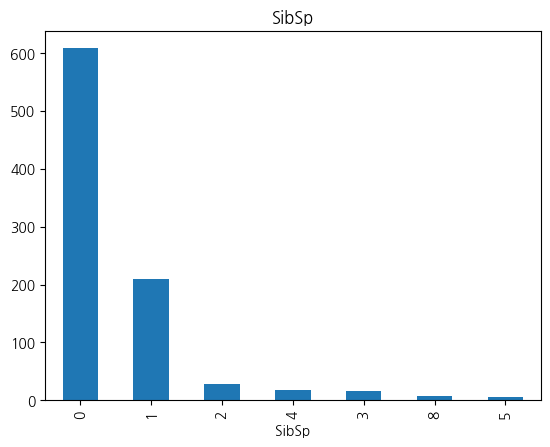

In [36]:
data1["SibSp"].value_counts().plot.bar(title = "SibSp")

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


Text(0.5, 1.0, 'Pclass Rate (Pie)')

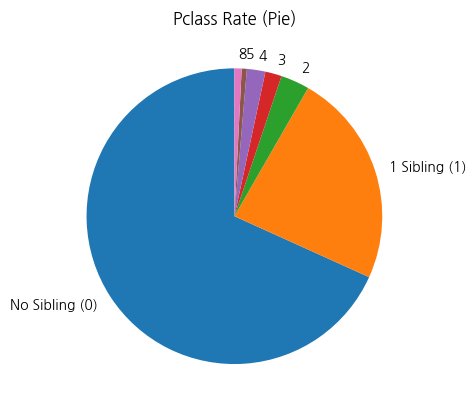

In [37]:
counts = data1["SibSp"].value_counts().sort_index()  # 범주별 count한 통계량 먼저 만들기
print(counts)
plt.pie(counts.values, labels=["No Sibling (0)", "1 Sibling (1)", "2",
                              "3", "4", "5",
                              "8"], startangle=90)
plt.title("Pclass Rate (Pie)")

## 'Parch' - 같이 탑승한 부모 또는 자녀의 수

In [38]:
data1["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [39]:
data1["Parch"].value_counts(normalize = True)

Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64

<Axes: title={'center': 'Parch'}, xlabel='Parch'>

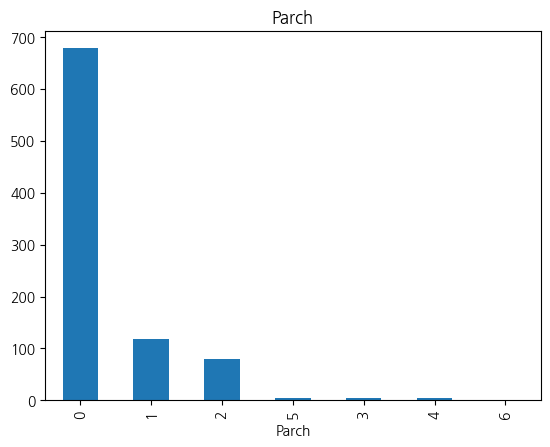

In [40]:
data1["Parch"].value_counts().plot.bar(title="Parch")

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Parch Rate (Pie)')

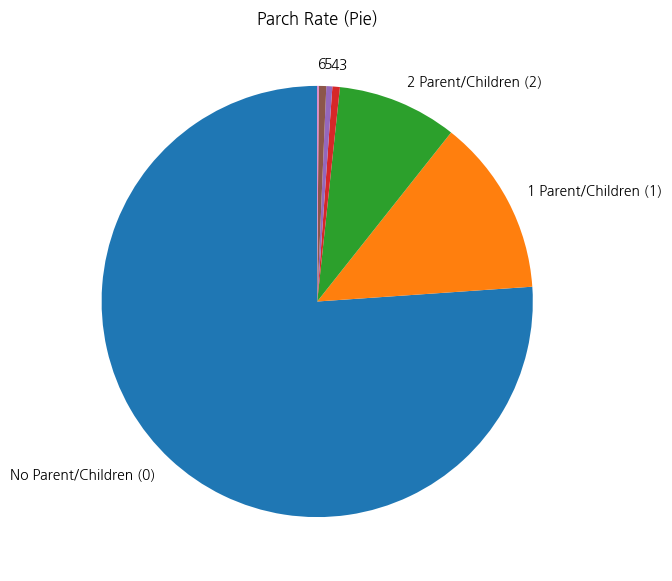

In [41]:
plt.figure(figsize = (10,7))
counts = data1["Parch"].value_counts().sort_index()  # 범주별 count한 통계량 먼저 만들기
print(counts)
plt.pie(counts.values, labels=["No Parent/Children (0)", "1 Parent/Children (1)", "2 Parent/Children (2)",
                              "3", "4", "5", "6"], startangle=90)
plt.title("Parch Rate (Pie)")

## 'Ticket' : 티켓

In [42]:
data1["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [43]:
data1["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

## Fare : 요금

In [44]:
data1["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare histogram')

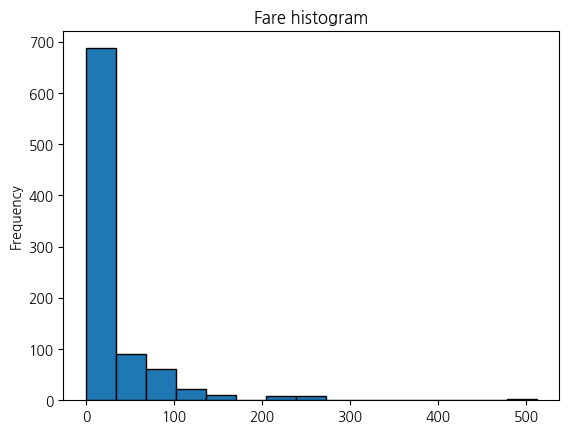

In [45]:
bins = 15
data1["Fare"].plot.hist(bins=bins, edgecolor="black")
plt.title("Fare histogram")

<Axes: title={'center': 'Fare'}>

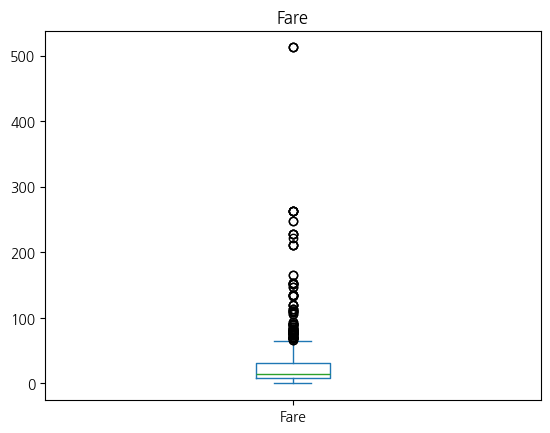

In [46]:
data1["Fare"].plot.box(title = "Fare")

## Cabin : 객실번호

In [47]:
data1["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

## Embarked : 탑승지

In [48]:
data1["Embarked"].isnull().sum() #결측치 2개

np.int64(2)

In [49]:
data1["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [50]:
data1["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [51]:
data1["Embarked"].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

<Axes: title={'center': 'Embarked'}, xlabel='Embarked'>

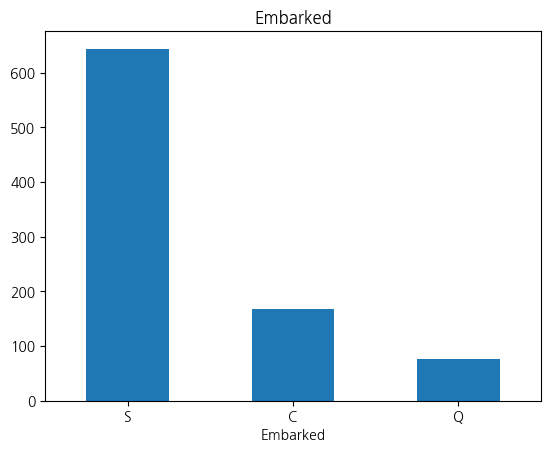

In [52]:
data1["Embarked"].value_counts().plot.bar(rot = 0, title="Embarked")

Embarked
C    168
Q     77
S    644
Name: count, dtype: int64


Text(0.5, 1.0, 'Embarked Rate (Pie)')

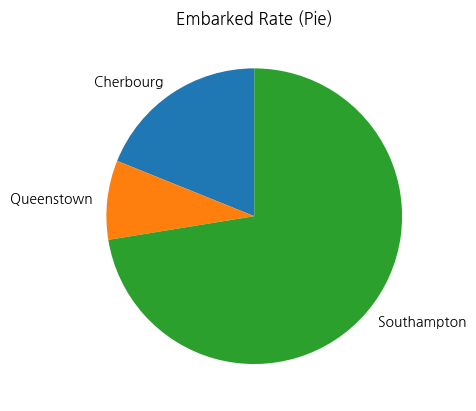

In [53]:
counts = data1["Embarked"].value_counts().sort_index()  # 범주별 count한 통계량 먼저 만들기
print(counts)
plt.pie(counts.values, labels=["Cherbourg", "Queenstown", "Southampton"], startangle=90)
plt.title("Embarked Rate (Pie)")

# 변수 두개 한번에 보기

## Sex x Survived(범주형 vs 범주형) : 교차표 or 히트맵

In [54]:
# Sex vs Survived
pd.crosstab(data1["Sex"], data1["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [55]:
# 퍼센트 비율로 확인하기
pd.crosstab(data1["Sex"], data1["Survived"], normalize="index") * 100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


Text(51.722222222222214, 0.5, 'Sex')

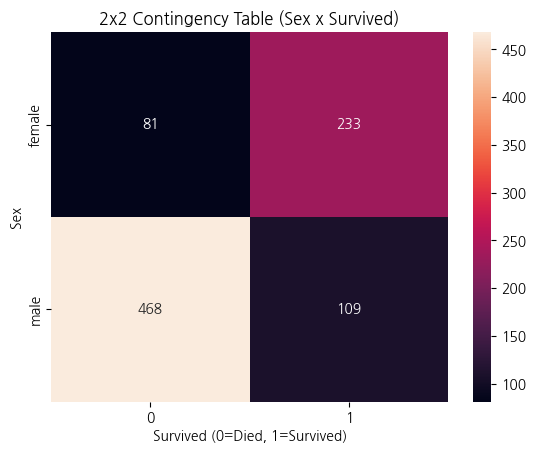

In [56]:
ct = pd.crosstab(data["Sex"], data["Survived"])
sns.heatmap(ct, annot=True, fmt="d", cbar=True)
plt.title("2x2 Contingency Table (Sex x Survived)")
plt.xlabel("Survived (0=Died, 1=Survived)")
plt.ylabel("Sex")

## Pclass x Age(범주형 vs 연속형) : boxplot or barplot

In [57]:
# Pclass에 따른 Age의 기술통계량 확인하기
data1.groupby("Pclass")['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


Text(0.5, 0, 'Pclass')

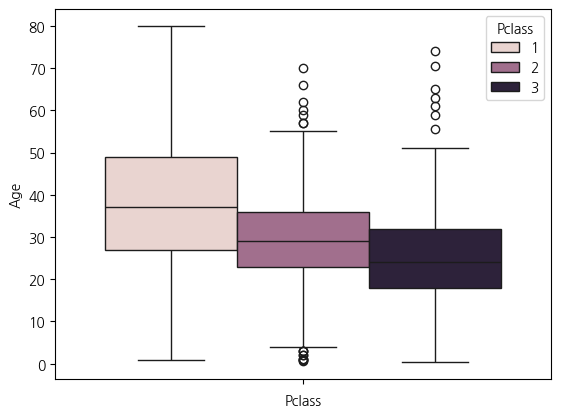

In [58]:
sns.boxplot(data=data1, y = "Age", hue="Pclass")
plt.xlabel("Pclass")

* boxplot의 중위수 선을 비교해보면 Pclass의 수가 낮을 수록 연령대가 높은 것을 확인할 수 있다.

<Axes: ylabel='Age'>

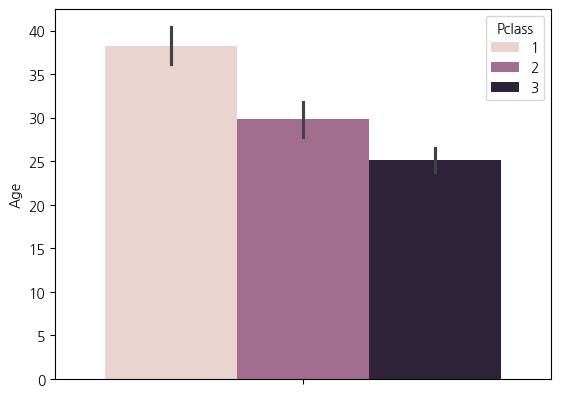

In [59]:
sns.barplot(data=data1, y = "Age", hue="Pclass")

## Age x Survived : 히스토그램

Text(0.5, 1.0, '생존 여부에 따른 나이')

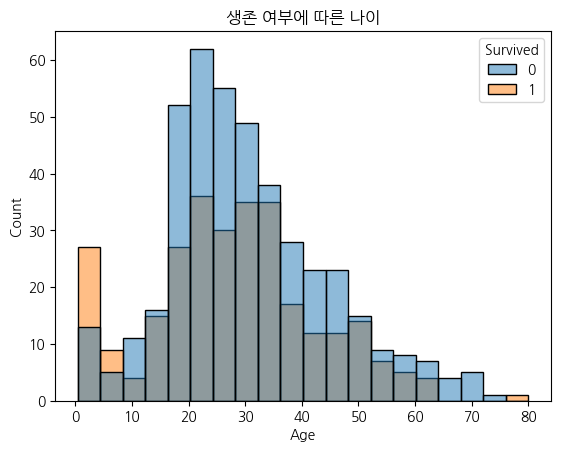

In [60]:
# Age vs Survived
sns.histplot(data=data1, x = "Age", hue="Survived")
plt.title("생존 여부에 따른 나이")

# 파생변수 만들기 : Family <- SibSp + Parch

In [61]:
data1["family"]=data1["SibSp"]+data1["Parch"]

In [62]:
data1[['family', 'SibSp', 'Parch']]

,family,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0


# Insight
* 현재까지 성별과 나이에 따른 생존(Survived)의 변화를 살펴 보았다. 그 결과 여자의 생존 확률은 약 74%이며 남자의 생존 확률은 약 18%로 성별에 따른 생존 확률의 유의미한 차이가 있었다. 또한 생존여부에 따른 나이 히스토그램을 보면 생존한 나이가 10세 이하와 75세 이상으로 확인된다. 즉, 유아 혹은 노인 중에만 생존자가 분포해 있다는 것을 확인했다.

* 결과적으로 성별과 나이가 생존에 유의미한 영향을 준다는 가설은 채택할만 하며 성별에 따라서는 여성이 남성에 비해 생존 확률이 높으며 나이에 따라서는 분포 양극에 해당하는 연령에서만 생존 가능성이 나타났다. 이것은 당시 상황을 생각해보면 짐작 가능하다. 타이타닉에서의 구조 우선순위가 사회적 약자나 여성이 높았다. 즉, 구명정 탑승 기회가 더 많이 주어졌다. 하지만 성별이나 나이의 효과가 다른 교랸변수와 얽혀 있을 수 있어 단변량 결과만으로 생존과의 인과를 확정하긴 어렵다.

# Additional EDA
* 티켓 번호와 객실번호는 같은 티켓이나 같은 객실을 쓰지 않는 한 모두 다를 것이다.(nunique값이 클 것이다.) 이것들이 생존 여부와 관계 있을까 생각을 해보면 먼저 티켓 번호는 생존 여부와 관계가 없는 것으로 판단되고 객실번호에 따른 객실 위치는 확인할 길이 없다. 따라서 이 변수들(Ticket, Cabin) 또한 삭제하는 게 맞다고 생각된다.
  
* Age 변수는 Right-Skewed 되어 있다. 따라서 Age변수의 177개의 결측치는 평균보다는 중위수로 대체하는 것이 적절다고 판단된다.

* 추가적으로 data1의 SibSp와 Parch 변수는 더해서 family변수로 저장하였으므로 이전 변수들(SibSp, Parch)은 삭제하는 게 맞다고 생각한다.

* 추가적으로 타이타닉호의 객실 위치를 보면 높은 등급의 객실이 구명정이 있는 갑판에 가까이 있다. 따라서 객실 등급에 따라서 생존 여부에도 차이가 있을 것으로 생각된다.

### 1. Ticket, Cabin, SibSp, Parch 변수 삭제

In [63]:
print(data1.columns.tolist())
data2 = data1.drop(columns = ["Ticket", "Cabin", "SibSp", "Parch"]).copy()
print(data2.columns.tolist())

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family']
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'family']


### 2. Age변수의 결측치를 중위값으로 대체

<Axes: >

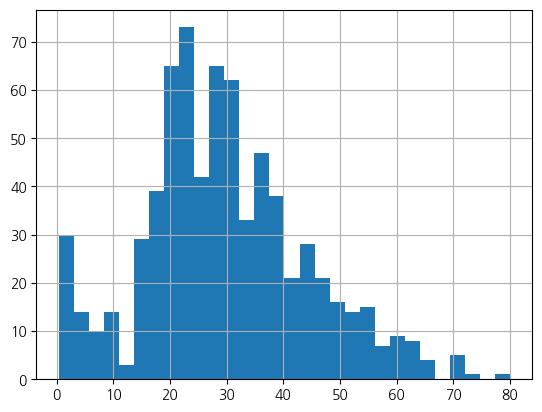

In [64]:
data2["Age"].dropna().hist(bins=30)  # Right-skewed 확인

In [65]:
print(data2["Age"].isna().sum())

177


In [66]:
age_median = data2["Age"].median()
data2["Age"] = data2["Age"].fillna(age_median)

0


<Axes: >

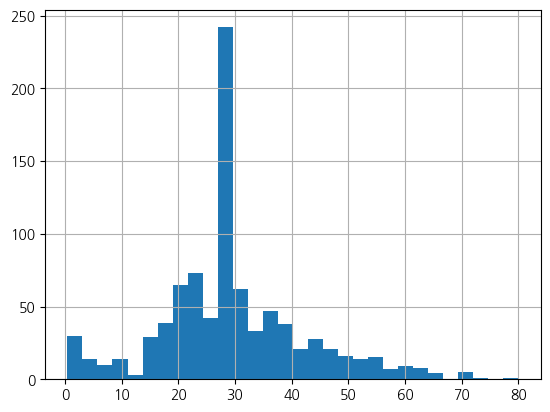

In [67]:
# 결과 확인 
print(data2["Age"].isna().sum())
data2["Age"].hist(bins=30)

### 3. Pclass vs Survived(범주형 vs 범주형) : 교차표 and 히트맵

In [68]:
# 교차표
pd.crosstab(data2["Pclass"], data2["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [69]:
# 비율 교차표
pd.crosstab(data2["Pclass"], data2["Survived"], normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Text(51.722222222222214, 0.5, 'Pclass')

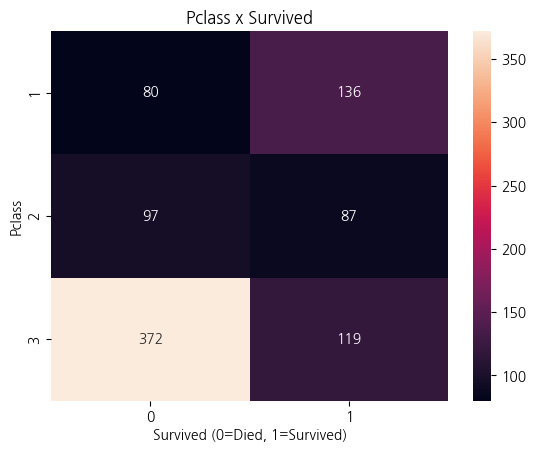

In [70]:
# 히트맵
ct = pd.crosstab(data2["Pclass"], data2["Survived"])
sns.heatmap(ct, annot=True, fmt="d", cbar=True)
plt.title("Pclass x Survived")
plt.xlabel("Survived (0=Died, 1=Survived)")
plt.ylabel("Pclass")

* 객실 등급이 높을 수록 갑판과 가까이 있어 구명정에 탑승할 확률이 높아 생존할 확률이 높다는 가설을 세워 확인해 본 결과 실제로 Pclass의 수가 낮을수록(객실등급이 높을수록) 생존 비율이 더 높게 나타났다. 이는 구조 과정에서 구명정 접근성, 사회적 우선순위 등이 등급에 따라 달랐을 가능성을 시사한다. 즉, 생존 여부는 개인의 특성 뿐 아니라 탑승 위치와 구명정 접근성 같은 환경적인 요인의 영향을 크게 받았을 수 있다고 생각한다.

### 4. Fare vs Survived(연속형 vs 범주형) : boxplot or barplot
* Fare가 높을수록 Pclass 수가 낮을 것(객실 등급이 높을 것)으로 예상되므로 Pclass와의 관계 먼저 확인 후 Survived와의 관련성을 확인해보자.

In [71]:
data2.groupby("Pclass")['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Text(0.5, 0, 'Pclass')

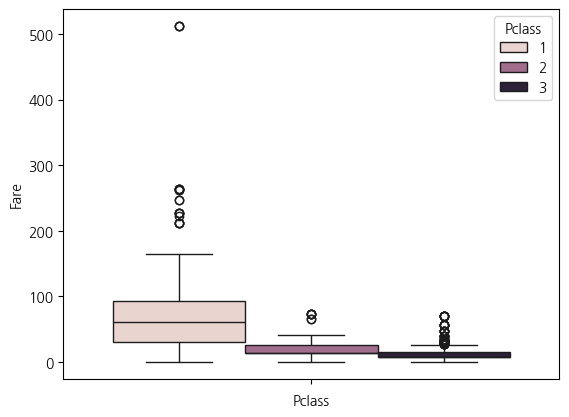

In [72]:
sns.boxplot(data=data2, y="Fare", hue="Pclass")
plt.xlabel("Pclass")

* 예상한 대로 요금이 올라갈수록 객실 등급이 올라가는 것을 확인할 수 있다. 객실 등급이 생존 여부와 관련이 있었기에 요금 또한 생존 여부와 관련이 있을 것으로 예상되므로 확인해보자.

In [73]:
data2.groupby("Survived")['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Text(0.5, 0, 'Survived')

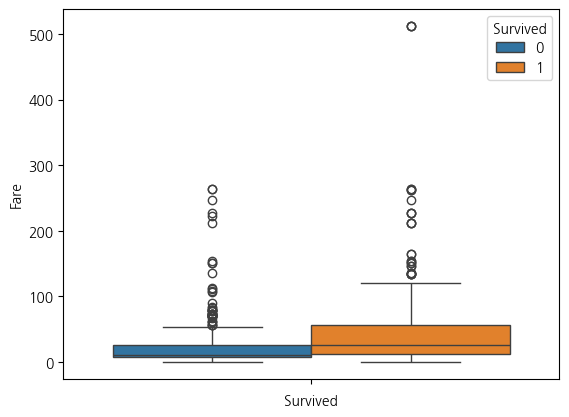

In [74]:
sns.boxplot(data=data2, y="Fare", hue="Survived")
plt.xlabel("Survived")

* 생존 여부에 따른 요금의 중위수를 확인하면 생존한 집단의 중위수가 더 높다. 즉 생존한 집단의 요금이 더 높으므로 반대로 요금이 높을수록 생존할 확률이 높다고 판단할 수 있다.

### 5. Embarked vs Survived(범주형 vs 범주형) : 교차표 or 히트맵

In [75]:
pd.crosstab(data2["Embarked"], data2["Survived"], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Text(51.722222222222214, 0.5, 'Embarked')

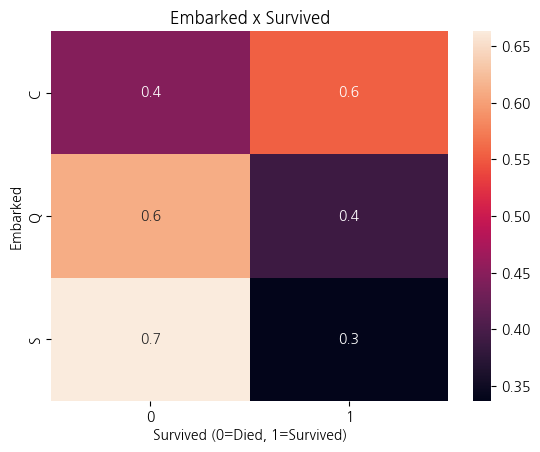

In [76]:
ct = pd.crosstab(data2["Embarked"], data2["Survived"], normalize='index')
sns.heatmap(ct, annot=True, fmt=".1f", cbar=True)
plt.title("Embarked x Survived")
plt.xlabel("Survived (0=Died, 1=Survived)")
plt.ylabel("Embarked")

* 승선 항구가 Cherbourg인 경우 다른 항구보다 생존 확률이 약간 더 높게 나타났지만 승선 항구에 따라 생존 여부에 눈에 띄는 차이가 없고 승선 항구와 생존 여부의 직접적인 연관성은 없기에 위의 히트맵에서 확인할 내용은 없다.

### 6. family vs Survived(연속형 vs 범주형) : boxplot or barplot

In [77]:
data2.groupby("Survived")['family'].mean()

Survived
0    0.883424
1    0.938596
Name: family, dtype: float64

Text(0.5, 0, 'Survived')

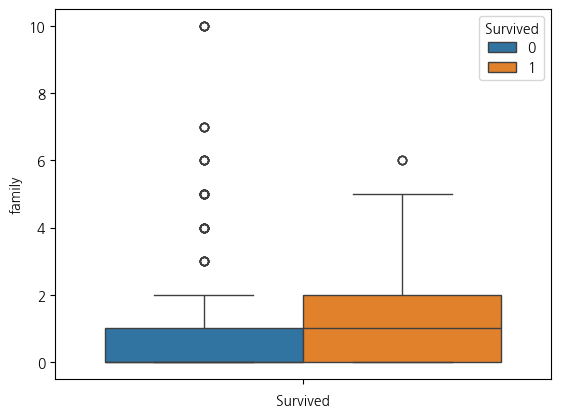

In [78]:
sns.boxplot(data=data2, y="family", hue="Survived")
plt.xlabel("Survived")

Text(0.5, 1.0, '생존 여부에 따른 가족 구성원 수')

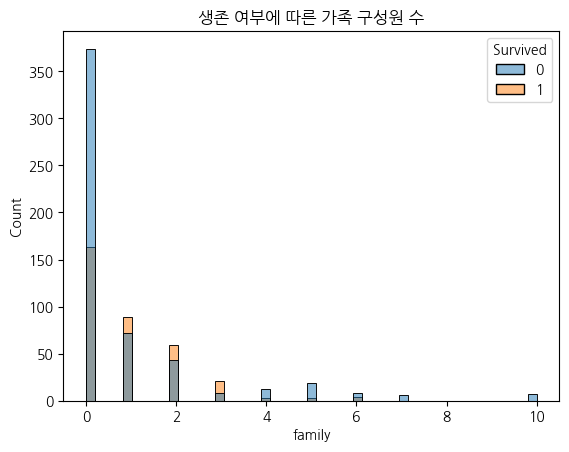

In [79]:
sns.histplot(data=data2, x = "family", hue="Survived")
plt.title("생존 여부에 따른 가족 구성원 수")

* 가족 구성원 수에 따라 생존률이 달라지는 경향이 관찰되었다. 혼자 탑승한 경우와 대가족의 경우 생존률이 낮고 2~4명 규모의 가족에서 상대적으로 높은 생존률을 보이는 패턴이 나타났다. 이는 위기 상황에서 동행인이 주는 도움 효과와 가족 규모가 커질수록 이동 및 의사결정이 어려워지는 요인이 함계 작용했을 가능성을 시사한다.

### 7. Name vs Survived(범주형 vs 범주형) : 교차표 or 히트맵
* Name이 문자형 자료이고 Mr., Mrs., Miss. 등을 포함하고 있으므로 Mr, Mrs, Miss, Other의 4가지 경우가 있는 categorical 변수를 만들고 이 범주형 변수와 생존 여부의 관계성을 확인한다.

In [80]:
data2["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [81]:
titles = np.select(condlist=
    [data2["Name"].str.contains(r"\bMr\.",  na=False),
    data2["Name"].str.contains(r"\bMrs\.", na=False),
    data2["Name"].str.contains(r"\bMiss\.", na=False),
    ], choicelist=
    ["Mr", "Mrs", "Miss"],
    default="Other"
)
data2["Title_cat"] = pd.Categorical(titles, categories=["Mr", "Mrs", "Miss", "Other"])
print(data2["Title_cat"].value_counts())

Title_cat
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64


In [82]:
pd.crosstab(data2["Title_cat"], data2["Survived"], normalize='index')

Survived,0,1
Title_cat,,
Mr,0.843327,0.156673
Mrs,0.208000,0.792000
Miss,0.302198,0.697802
Other,0.477612,0.522388


Text(51.722222222222214, 0.5, 'Embarked')

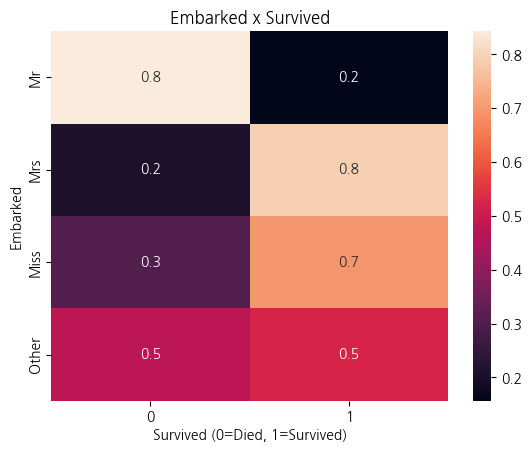

In [84]:
ct = pd.crosstab(data2["Title_cat"], data2["Survived"], normalize='index')
sns.heatmap(ct, annot=True, fmt=".1f", cbar=True)
plt.title("Embarked x Survived")
plt.xlabel("Survived (0=Died, 1=Survived)")
plt.ylabel("Embarked")

# Insight
* Ticket, Cabin 변수는 nunique 값이 매우 큰 고유값이며 생존 여부와 관련이 없다고 판단되어 삭제했다. SibSp, Parch 변수들 또한 family라는 새로운 변수를 생성하여 대체했기 때문에 삭제했다.
* Age 변수의 히스토그램을 보면 우측 편향되어 있는 것을 확인했다. 따라서 결측치를 평균보다는 중위수값으로 대체하는 했다.
* 객실 등급과 생존 여부의 관계를 확인해 본 결과 객실 등급이 높을 수록 생존 확률이 높다는 것을 알 수 있다. 타이타닉 호의 객실 위치를 보면 높은 등급의 객실이 구명정이 있는 갑판과 가까이 있다. 이 환경적인 요인이 생존 여부에 영향을 주었지 않을까 생각된다.
* 요금과 생존 여부의 관계도 확인하려고 했다. 그 전에 객실 등급이 높을수록 요금이 비싸다는 통상적인 관계기 때문에 boxplot으로 확인해봤다. 그 결과 당연하게도 높은 등급의 객실은 요금이 비쌌다. 직전에 객실 등급과 생존 여부의 관련성을 확인해 봤으므로 요금과 생존 여부와도 관계도 boxplot을 그려 재확인해봤다.
* 다음으로 승선 항구와 생존의 관련성도 확인해 봤다. 다른 항구에 비해 Cherbourg항구에서 탑승한 승객의 경우 다른 항구에서 탑승한 승객보다 생존 확률이 높았다. 이것은 항구에 따른 차이라기보다는 승객의 사회경제적 구성과 연결되어 생존 여부에 영향을 주었다고 생각한다. 즉 항구가 원인이라기보다는 다른 요인이 대리 변수처럼 작동했다고 생각된다.
* 가족 구성원 수가 2명에서 4명 사이인 경우에 상대적으로 높은 생존률을 보인다. 이는 동행인이 주는 도움 효과가 있음과 가족 규모가 커질수록 이동과 의사결정이 어려워진다는 두 가지를 고려한 결과하고 볼 수 있다.
* 이름에 Mr, Mrs 등을 포함하고 있으므로 이것을 Mr, Mrs, Miss, Other 포함 유무에 따른 범주형 변수를 추가하고 생존 여부와의 관계를 확인했다. 그 결과 Mr가 포함된 이름은 생존 확률이 20%, Mrs는 80%, Miss는 70%이다. 이것은 성별과 강하게 연결되고 당시 구조 과정에서 여성과 아이들 먼저인 우선순위가 작동했을 가능성을 시사한다. 즉 Title 자체의 영향이라기 보다는 성별, 나이와 같은 변수가 대리 변수로 작용한다고 해석하는 게 맞는 것 같다.